In [72]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

"""
- Data Source:
    - Data was pulled from the PA commonwealth 'Crash Incident Details CY 1997' from data.pa.gov
    https://data.pa.gov/Public-Safety/Crash-Incident-Details-CY-1997-Current-Annual-Coun/dc5b-gebx
    
- Question:
    - What is the likelihood that unbelted drivers involved in crashes will also have additional
    driving infractions? If so, do they result in more severe crashes?
    
- Key:
    ## = Comments
    #  = Commented out code
"""

## Reading in the sampled csv files and setting to variables

unbelted_data = pd.read_csv('unbelted_sampled_normalized.csv')
belted_data = pd.read_csv('belted_sampled_normalized.csv')

#unbelted_data.head()
#belted_data.head()
#print(unbelted_data.dtypes)
print(list(unbelted_data))

['Crash Record Number', 'County Code', 'County Name', 'Municipality Code', 'Municipality Name', 'District Code', 'District Name', 'Police Agency Code', 'Police Agency Name', 'Crash Year', 'Crash Month', 'Time of Day', 'Hour of Day', 'Illumination', 'Road Condition', 'Collision Type', 'Urban / Rural', 'Fatality Count', 'Injury Count', 'Person Count', 'Total Unit Count', 'Latitude', 'Longitude', 'Vehicle Count', 'Suspected Serious Injury Count', 'Suspected Minor Injury Count', 'Possible Injury Count', 'Total Injury Count', '16 Year Old Driver Count', '17 Year Old Driver Count', '18 Year Old Driver Count', '19 Year Old Driver Count', '20 Year Old Driver Count', '50-64 Year Old Driver Count', '65-74 Year Old Driver Count', '75 Plus Year Old Driver Count', 'Unbelted Occupant Count', 'Latitude (Decimal)', 'Longitude (Decimal)', 'Interstate', 'State Road', 'Local Road Only', 'Turnpike', 'Injury', 'Fatal', 'Alcohol Related', 'Drinking Driver', 'Underage Drinking Driver', 'Unlicensed', 'Distrac

In [61]:
"""
Extracting injury counts and severities from each sampled dataframe set
Tabulating the counts of each of the Series and writing to csvs
"""

unbelted_injuries = unbelted_data[['Injury Count', 'Suspected Serious Injury Count', 
                                  'Suspected Minor Injury Count', 'Possible Injury Count',
                                 'Total Injury Count', 'Injury', 'Fatal']]
belted_injuries = belted_data[['Injury Count', 'Suspected Serious Injury Count', 
                                  'Suspected Minor Injury Count', 'Possible Injury Count',
                                 'Total Injury Count','Injury', 'Fatal']]


## credit goes to this StackOverflow user for the solution (https://tinyurl.com/y7vwpo54)
unbelted_injuries_tab = pd.DataFrame(unbelted_injuries.apply((lambda x: pd.Series.value_counts(x, dropna=True))))
belted_injuries_tab = pd.DataFrame(belted_injuries.apply((lambda x: pd.Series.value_counts(x, dropna=True))))

## writing output to a csv to use for final report
pd.DataFrame.to_csv(unbelted_injuries_tab, '/Users/zack/ate252_ccac/capstone_proj/code/output_csv/unbelted_injuries.csv')
pd.DataFrame.to_csv(belted_injuries_tab, '/Users/zack/ate252_ccac/capstone_proj/code/output_csv/belted_injuries.csv')

In [64]:
"""
Extracing violation from the sampled dataframes
Writing them to csv using teh same tablulation methods as above
"""

unbelted_violations = unbelted_data[['Alcohol Related', 'Drinking Driver', 'Underage Drinking Driver', 
                                     'Unlicensed', 'Distracted', 'Cell Phone', 'No Clearance', 
                                     'Running Red Light', 'Tailgating', 'Speeding', 'Speeding Related', 
                                     'Aggressive Driving', 'Fatigue / Asleep', 'Unbelted', 
                                     'NHTSA Aggressive Driving', 'Running Stop Sign', 'Hit Parked Vehicle', 
                                     'Suspected Serious Injury', 'Suspected Minor Injury', 'Drug Related', 
                                     'Illegal Drug Related', 'Drugged Driver', 'Impaired Driver']]

belted_violations = belted_data[['Alcohol Related', 'Drinking Driver', 'Underage Drinking Driver', 
                                     'Unlicensed', 'Distracted', 'Cell Phone', 'No Clearance', 
                                     'Running Red Light', 'Tailgating', 'Speeding', 'Speeding Related', 
                                     'Aggressive Driving', 'Fatigue / Asleep', 'Unbelted', 
                                     'NHTSA Aggressive Driving', 'Running Stop Sign', 'Hit Parked Vehicle', 
                                     'Suspected Serious Injury', 'Suspected Minor Injury', 'Drug Related', 
                                     'Illegal Drug Related', 'Drugged Driver', 'Impaired Driver']]

## Quick look at the new subset
#belted_violations.describe()
## This took a long time to figure out, namely that the apply() function was needed
## credit goes to this StackOverflow user for the solution (https://tinyurl.com/y7vwpo54)

## Tabulation of violations per dataset
unbelted_violations_tab = pd.DataFrame(unbelted_violations.apply((lambda x: pd.Series.value_counts(x, dropna=True))))
pd.DataFrame.to_csv(unbelted_violations_tab, '/Users/zack/ate252_ccac/capstone_proj/code/output_csv/unbelted_violations.csv')

## Writing out to csv
belted_violations_tab = pd.DataFrame(belted_violations.apply((lambda x: pd.Series.value_counts(x, dropna=True))))
pd.DataFrame.to_csv(belted_violations_tab, '/Users/zack/ate252_ccac/capstone_proj/code/output_csv/belted_violations.csv')

#unbelted_violations.describe()

In [67]:
"""
Aggregating metrics describing the data
"""

## Where did these crashes occur
unbelted_location = unbelted_data[['Interstate', 'State Road', 'Local Road Only', 'Turnpike']]
belted_location = belted_data[['Interstate', 'State Road', 'Local Road Only', 'Turnpike']]

## Write the locations out to a dataframe with the sum method
unbelted_loc = pd.DataFrame(unbelted_location.sum(), columns=['sum'])
belted_loc = pd.DataFrame(belted_location.sum(), columns=['sum'])

## quick check
#print(unbelted_loc)

## Write location summaries out to separate csvs
pd.DataFrame.to_csv(unbelted_loc, '/Users/zack/ate252_ccac/capstone_proj/code/output_csv/unbelted_locations.csv')
pd.DataFrame.to_csv(belted_loc, '/Users/zack/ate252_ccac/capstone_proj/code/output_csv/belted_locations.csv')



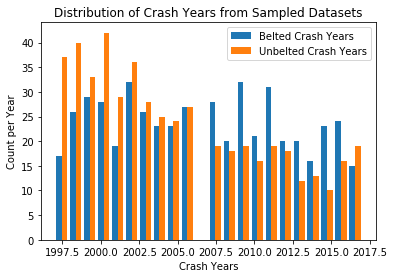

In [70]:
"""
Describing the data by year
And save graph
"""

belted = belted_data['Crash Year']
unbelted = unbelted_data['Crash Year'],

plt.hist([belted, unbelted], bins=22, label=['Belted Crash Years', 'Unbelted Crash Years'])
#plt.hist(unbelted, stacked=True, label='Unbelted Crash Years')
plt.legend(loc='best')
plt.title(label='Distribution of Crash Years from Sampled Datasets')
plt.xlabel(xlabel='Crash Years')
#plt.xticks(step=1)
plt.ylabel(ylabel='Count per Year')
plt.savefig('/Users/zack/ate252_ccac/capstone_proj/code/crash_years.png')
plt.show()


#belted_plot = plt.hist(belted_data['Crash Year'])

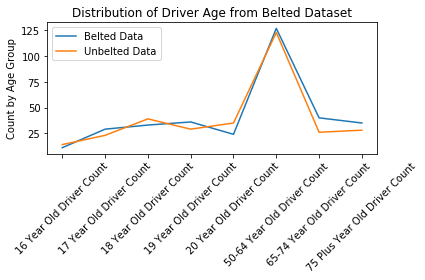

In [74]:
"""
Describe the crash data by driver age
and save as png
"""
belted_da = belted_data[['16 Year Old Driver Count', '17 Year Old Driver Count', 
                         '18 Year Old Driver Count', '19 Year Old Driver Count', 
                         '20 Year Old Driver Count', '50-64 Year Old Driver Count', 
                         '65-74 Year Old Driver Count', '75 Plus Year Old Driver Count']]
unbelted_da = unbelted_data[['16 Year Old Driver Count', '17 Year Old Driver Count', 
                         '18 Year Old Driver Count', '19 Year Old Driver Count', 
                         '20 Year Old Driver Count', '50-64 Year Old Driver Count', 
                         '65-74 Year Old Driver Count', '75 Plus Year Old Driver Count']]

belted_da_df = pd.DataFrame(belted_da.sum(), columns=['sum'])
unbelted_da_df = pd.DataFrame(unbelted_da.sum(), columns=['sum'])

x_labels = ['16 Year Old Driver Count', '17 Year Old Driver Count', 
                         '18 Year Old Driver Count', '19 Year Old Driver Count', 
                         '20 Year Old Driver Count', '50-64 Year Old Driver Count', 
                         '65-74 Year Old Driver Count', '75 Plus Year Old Driver Count']

plt.plot(belted_da_df, label='Belted Data')
plt.plot(unbelted_da_df, label='Unbelted Data')
plt.legend(loc='best')
plt.title(label='Distribution of Driver Age from Belted Dataset')
plt.ylabel(ylabel='Count by Age Group')
plt.xticks(x_labels, rotation=45)
#plt.Axes.set_xticklabels(labels=['16 Year Old Driver Count', '17 Year Old Driver Count', 
#                         '18 Year Old Driver Count', '19 Year Old Driver Count', 
#                         '20 Year Old Driver Count', '50-64 Year Old Driver Count', 
#                         '65-74 Year Old Driver Count', '75 Plus Year Old Driver Count'])
plt.tight_layout()
plt.savefig('/Users/zack/ate252_ccac/capstone_proj/code/driver_age.png')
plt.show()